# 05. Naive Bayes Classifier - Titanic Dataset

In [48]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelEncoder, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

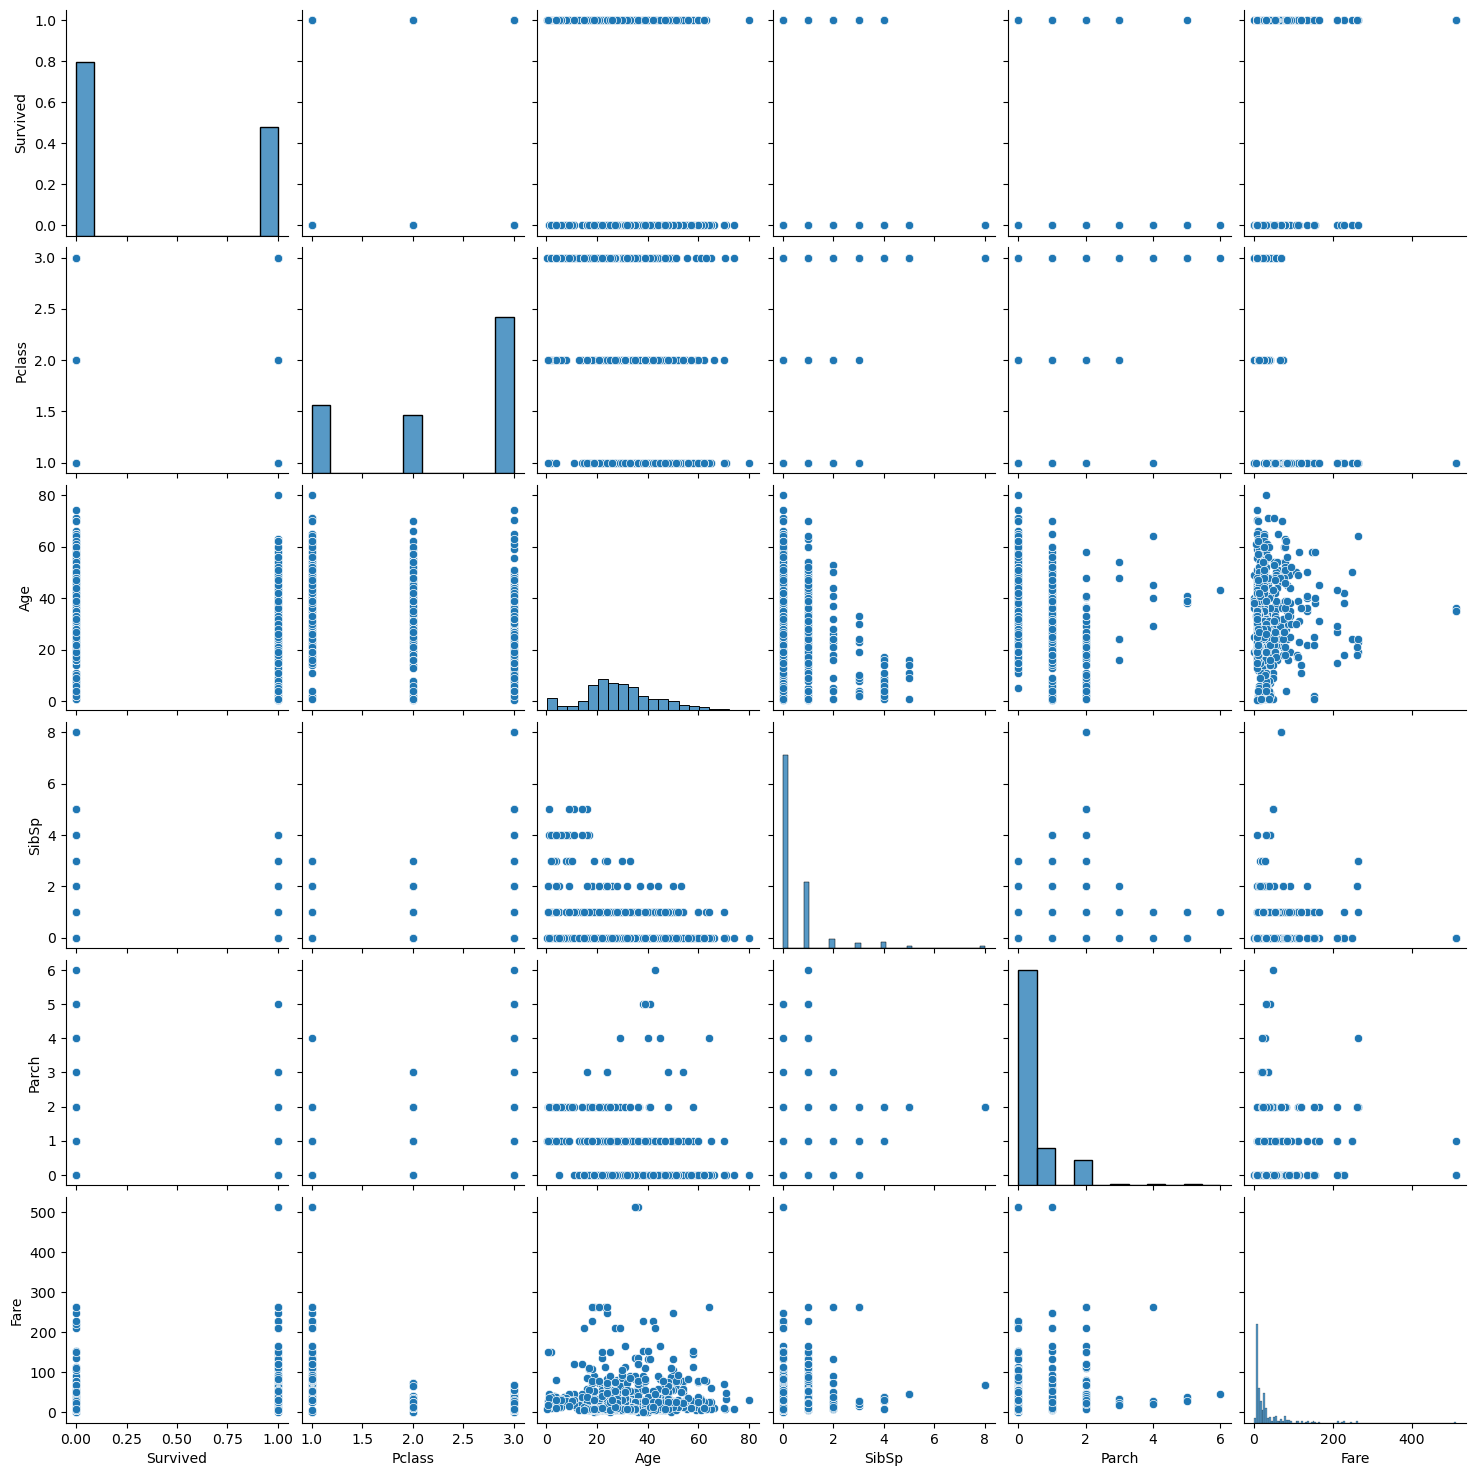

In [47]:
# Load the dataset
df = pd.read_csv("titanic.csv")
df = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
sns.pairplot(df)

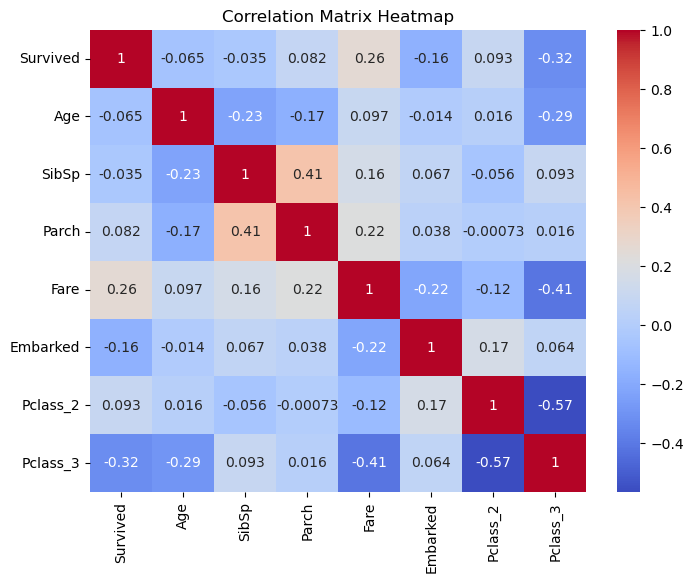

Survived       Age  SibSp  Parch      Fare  Embarked  Pclass_2  Pclass_3
0           0 -0.565736      1      0 -0.502445         2         0         1
1           1  0.663861      1      0  0.786845         0         0         0
2           1 -0.258337      0      0 -0.488854         2         0         1
3           1  0.433312      1      0  0.420730         2         0         0
4           0  0.433312      0      0 -0.486337         2         0         1
..        ...       ...    ...    ...       ...       ...       ...       ...
886         0 -0.181487      0      0 -0.386671         2         1         0
887         1 -0.796286      0      0 -0.044381         2         0         0
888         0 -0.104637      1      2 -0.176263         2         0         1
889         1 -0.258337      0      0 -0.044381         0         0         0
890         0  0.202762      0      0 -0.492378         1         0         1

[891 rows x 8 columns]

In [40]:
# Handle missing values
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# Normalize numerical features
scaler = StandardScaler()
df[['Age', 'Fare']] = scaler.fit_transform(df[['Age', 'Fare']])
# df = df.drop("Embarked", axis = 1)

# df.head()
# Encode 'Embarked' column
df['Embarked'] = LabelEncoder().fit_transform(df['Embarked'])


# Encode the 'Pclass' column using one-hot encoding
df = pd.get_dummies(df, columns=['Pclass'], drop_first=True)
# 
# Plot the correlation matrix heatmap
plt.figure(figsize=(8, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()
df

In [41]:
# Split the data into train and test sets
X = df.drop('Survived', axis=1)
y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
# Initialize and fit the Gaussian Naive Bayes classifier
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [43]:
# Make predictions on the test set
y_pred = classifier.predict(X_test)

In [44]:
# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Confusion Matrix:
 [[78 27]
 [35 39]]
Accuracy: 0.6536312849162011


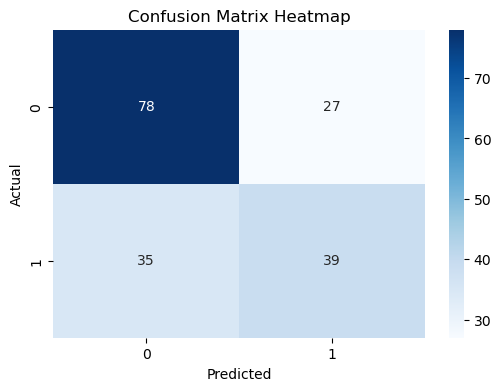

In [45]:
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()